In [2]:
import pandas as pd
#The dataset contains 216 columns(215 Features, 1 Class) and 15,036 rows
android_data = pd.read_csv("datasets/drebin-215-dataset-5560malware-9476-benign.csv", encoding="utf-8", low_memory=False, na_values=["N/A", "None", "-", " ", "?"])
android_data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [3]:
android_data.shape

(15036, 216)

In [5]:
android_data = android_data.dropna()
android_data.shape

(15031, 216)

In [6]:
print(android_data["class"].unique())

['S' 'B']


In [7]:
android_data["class"] = android_data["class"].str.strip()
android_data["class"] = android_data["class"].map({"B": 0, "S":1})
android_data.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1


In [9]:
class_counts = android_data["class"].value_counts()
print(class_counts)

class
0    9476
1    5555
Name: count, dtype: int64


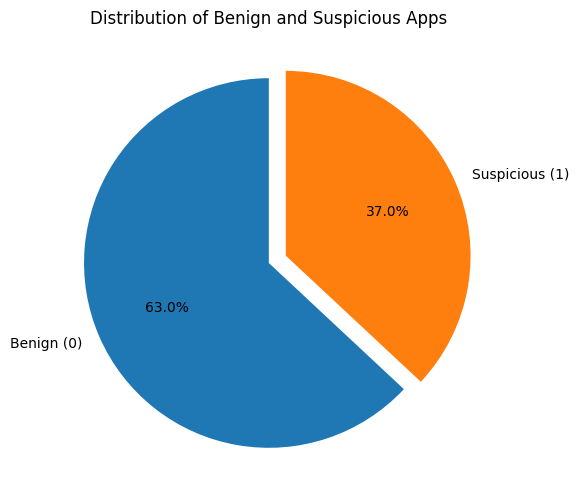

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=["Benign (0)", "Suspicious (1)"], autopct="%1.1f%%", startangle=90, explode=(0, 0.1))
plt.title("Distribution of Benign and Suspicious Apps")
plt.show()

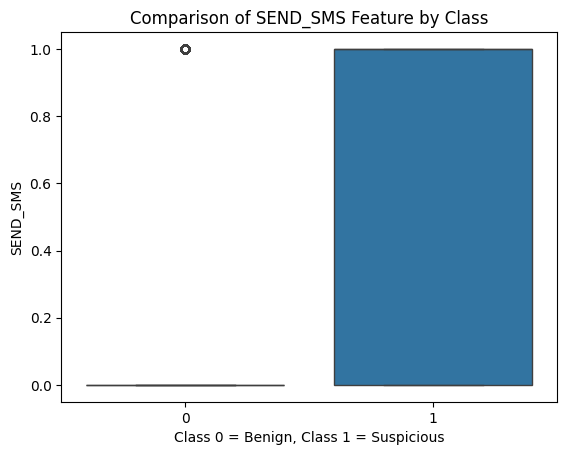

In [11]:
import  seaborn as sns

sns.boxplot(x="class", y="SEND_SMS", data=android_data)
plt.xlabel("Class 0 = Benign, Class 1 = Suspicious")
plt.ylabel("SEND_SMS")
plt.title("Comparison of SEND_SMS Feature by Class")
plt.show()

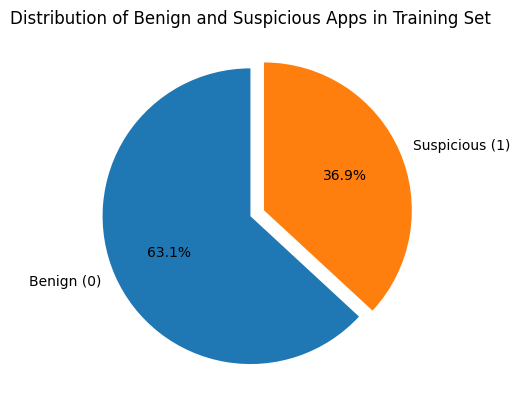

In [29]:
from sklearn.model_selection import train_test_split

X = android_data.drop("class", axis=1) #Features
y = android_data["class"] #Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_class_counts = y_train.value_counts()
plt.pie(train_class_counts, labels=["Benign (0)", "Suspicious (1)"], autopct="%1.1f%%", startangle=90, explode=(0, 0.1))
plt.title("Distribution of Benign and Suspicious Apps in Training Set")
plt.show()


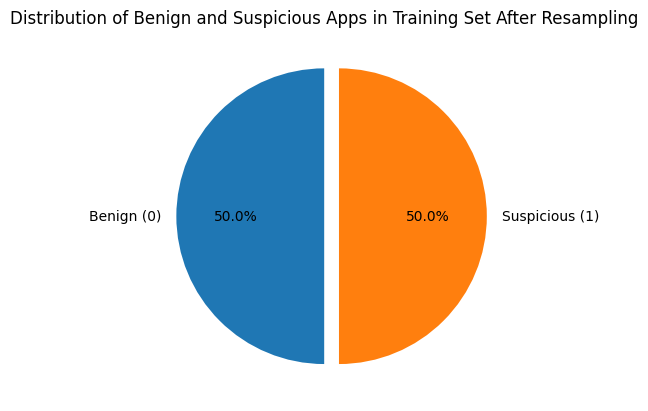

In [30]:
#Balancing both classes in training set
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train,y_train)
resampled_train_class_counts = y_train_resampled.value_counts()
plt.pie(resampled_train_class_counts, labels=["Benign (0)", "Suspicious (1)"], autopct="%1.1f%%", startangle=90, explode=(0, 0.1))
plt.title("Distribution of Benign and Suspicious Apps in Training Set After Resampling")
plt.show()


In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42) #n_estimators is the no. of decision trees
rf_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf_classifier.predict(X_test)

Accuracy:  0.9863651479880279
Classification Report:                precision    recall  f1-score   support

           0       0.98      1.00      0.99      1886
           1       0.99      0.97      0.98      1121

    accuracy                           0.99      3007
   macro avg       0.99      0.98      0.99      3007
weighted avg       0.99      0.99      0.99      3007



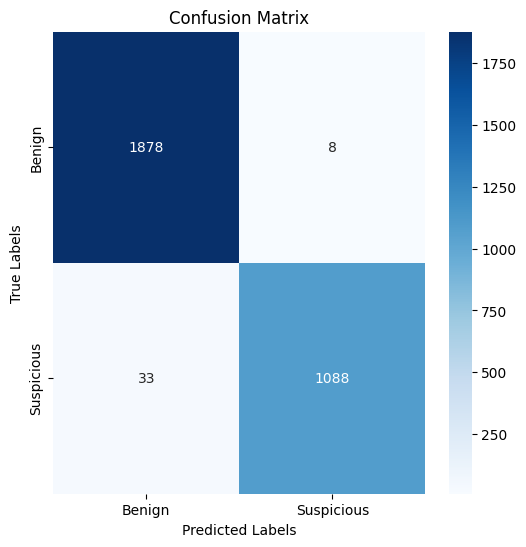

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score_rf =  accuracy_score(y_test, y_pred_rf)
print("Accuracy: ",accuracy_score_rf)
print("Classification Report: ", classification_report(y_test, y_pred_rf))

conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Suspicious"], yticklabels=["Benign", "Suspicious"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_resampled, y_train_resampled)
y_pred_lr = lr_model.predict(X_test)

Accuracy:  0.9760558696375125
Classification Report:                precision    recall  f1-score   support

           0       0.99      0.98      0.98      1886
           1       0.96      0.98      0.97      1121

    accuracy                           0.98      3007
   macro avg       0.97      0.98      0.97      3007
weighted avg       0.98      0.98      0.98      3007



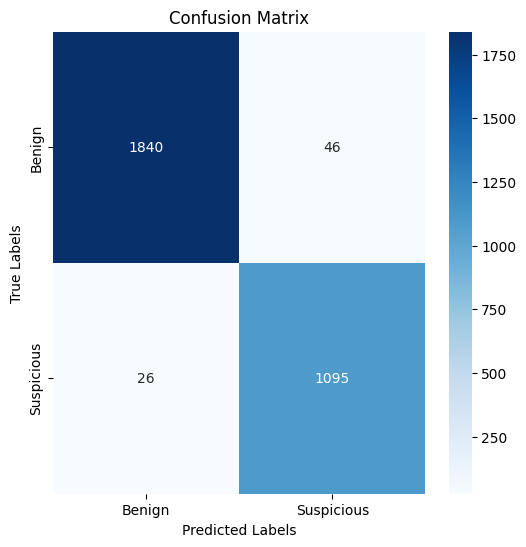

In [34]:
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy: ", accuracy_score_lr)
print("Classification Report: ", classification_report(y_test, y_pred_lr))

conf_matrix = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Suspicious"], yticklabels=["Benign", "Suspicious"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)
y_pred_dt = dt_classifier.predict(X_test)

Accuracy:  0.9710675091453276
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98      1886
           1       0.96      0.96      0.96      1121

    accuracy                           0.97      3007
   macro avg       0.97      0.97      0.97      3007
weighted avg       0.97      0.97      0.97      3007



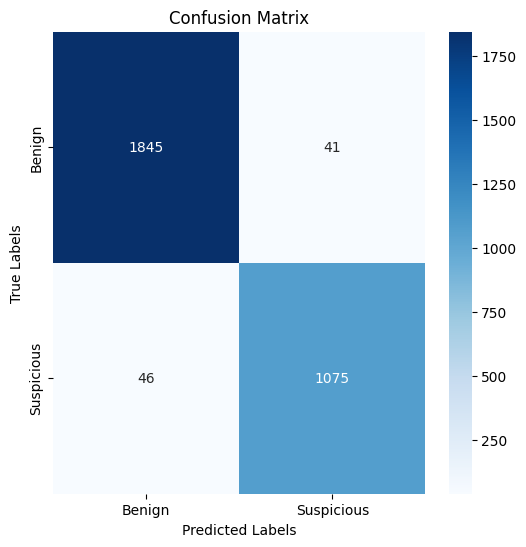

In [36]:
accuracy_score_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy: ", accuracy_score_dt)
print("Classification Report: ", classification_report(y_test, y_pred_dt))

conf_matrix = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Suspicious"], yticklabels=["Benign", "Suspicious"])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

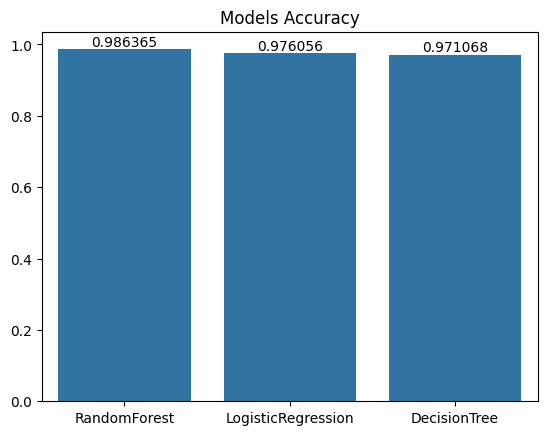

In [37]:
model_labels = ["RandomForest", "LogisticRegression", "DecisionTree"]
accuracy_scores = [accuracy_score_rf, accuracy_score_lr, accuracy_score_dt]

ax = sns.barplot(x=model_labels, y=accuracy_scores)
plt.title("Models Accuracy")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [38]:
#RandomForestClassifier outperformed both LogisticRegression and DecisionTreesC
#We will rely on RandomForestClassifier for that reason

import  joblib
joblib.dump(rf_classifier, "rf_classifier.pkl")
print("Best Model is Trained and Saved Successfully!!!")

Best Model is Trained and Saved Successfully!!!
